# 聚类

聚类任务的定义：聚类试图将数据集的无标记样本划分为若干个通常不想交的子集，每个子集被称为一个**“簇”**。簇对应的概念语义需要使用者来把握命名。

假定样本集 $D = \{\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_m\}$ 包含m个无标记样本，每个样本 $\mathbf{x}_i = (x_{i1}; x_{i2};...;x_{in})$ 是一个n维特征向量，聚类将D划分为 k 个不相交的簇 $\{C_l | l = 1,2,...,k\}$,其中

$$ C_m\cap C_n|_{m\neq n} = \emptyset \; and \; D = \cup_{l=1}^k C_l$$

我们用 $\lambda_j \in \{1,2,...,k\}$ 表示样本 $\mathbf{x}_j$ 的“簇标记”，即 $\mathbf{x}_j \in C_{\lambda_j}$。于是聚类的结果可以用包含m个元素的簇标记向量 $\mathbf{\lambda} = (\mathbf{\lambda}_1,\mathbf{\lambda}_2,...,\mathbf{\lambda}_m)$ 表示。

## 性能度量

聚类性能度量也称为聚类“有效性指标”，如图字面意思，作用在于：

1. 通过某种性能度量来评估聚类结果的好坏；
2. 可以将性能度量作为聚类过程的优化目标。

直观上，我们希望聚类结果可以达到：**同一簇的样本尽可能相似，不同簇的样本尽可能不同。** 也就是说，**聚类结果的“簇内相似度”高，“簇间相似度”低。**

聚类性能度量分为两类：

* 将聚类结果与某个“参考模型”进行比较，称为“外部指标”；
* 之间考察聚类结果，称为“内部指标”。

### 外部指标

对数据集 D，假定通过聚类给出的簇划分为 $S = \{ C_1, C_2, ...,C_k\}$，参考外部给出的簇划分为 $S^\ast = \{ C_1^\ast, C_2^\ast, ...,C_k^\ast\}$。相应，令 $\lambda,\lambda^\ast$ 分别表示与 $S, S^\ast$ 对应的簇标记向量。

我们将样本两两配对考虑，定义

$$
a = |SS|, \quad SS = \{(\mathbf{x}_i,\mathbf{x}_j)| \lambda_i = \lambda_j, \lambda_i^\ast = \lambda_j^\ast, i < j\}\\
b = |SD|, \quad SD = \{(\mathbf{x}_i,\mathbf{x}_j)| \lambda_i = \lambda_j, \lambda_i^\ast \neq \lambda_j^\ast, i < j\}\\
a = |DS|, \quad DS = \{(\mathbf{x}_i,\mathbf{x}_j)| \lambda_i \neq \lambda_j, \lambda_i^\ast = \lambda_j^\ast, i < j\}\\
a = |DD|, \quad DD = \{(\mathbf{x}_i,\mathbf{x}_j)| \lambda_i \neq \lambda_j, \lambda_i^\ast \neq \lambda_j^\ast, i < j\}
$$

上述的四个分类基于 **是否在 S 中属于同一个簇 以及 是否在 $S^\ast$ 中属于同一个簇。** 因为每个样本对要满足 $i < j$，所以有 $a + b + c + d = m(m-1)/2$ 成立。

基于上述的定义我们可以导出以下常用的聚类性能度量的外部指标：

* Jaccard 系数：

$$JC = \frac{a}{a+b+c}$$

* FM指数：

$$FMI = \sqrt{\frac{a}{a+b}\cdot \frac{a}{a+c}}$$

* Rand指数：

$$RI = \frac{2(a+d)}{m(m-1)}$$

显然，上述性能度量的结果值均在 $[0,1]$ 之间，值越大越好。

### 内部指标

对于 $S = \{ C_1, C_2, ...,C_k\}$，我们首先定义

$$\begin{split}
avg(C) &= \frac{2}{|C|(|C|-1)}\sum_{1 \leq i<j\leq |C|}dist(\mathbf{x}_i, \mathbf{x}_j)\\
diam(C) &= \max_{1 \leq i<j\leq |C|}dist(\mathbf{x}_i, \mathbf{x}_j) \\
d_{\min}( C_i, C_j) &= \min_{\mathbf{x}_i \in C_i, \mathbf{x}_j\in C_j} dist(\mathbf{x}_i, \mathbf{x}_j)\\
d_{cen}( C_i, C_j) &= dist(\mathbf{\mu}_i, \mathbf{\mu}_j)
\end{split}$$

其中 $dist(\cdot,\cdot)$ 用于计算两个样本之间的距离，度量方法我们下一节再介绍，$\mu$ 表示簇 C 的中心点 $\mu = \frac{1}{|C|}\sum_{1 \leq i\leq |C|}\mathbf{x}_i$。

上面四个公式的含义分别是：

* $avg(C)$ 对应于簇内样本之间的平均距离；
* $diam(C)$ 对应于簇内样本间的最远距离；
* $d_{\min}( C_i, C_j)$ 对应于簇之间的最近样本之间的距离；
* $d_{cen}( C_i, C_j)$ 对应于簇之间的中心点之间的距离。

基于上述定义我们可以导出以下常用的聚类性能度量的内部指标：

* DB 系数：

$$DBI = \frac{1}{k}\sum_{i=1}^k \max_{j\neq i}\left( \frac{avg(C_i)+ avg(C_j)}{d_{cen}( C_i, C_j)}\right)$$

* Dunn 指数：

$$DI = \min_{1\leq i\leq k}\left( \min_{j\neq i}\left( \frac{d_{\min}( C_i, C_j)}{\max_{1\leq l\leq k}diam(C_l)}\right)\right)$$


显然，DBI 的值越小越好； DI 值越大越好。

## 距离度量

对函数 $dist(\cdot,\cdot)$ ，若它是一个“距离度量”，则需满足一些基本性质：

$$\begin{split}
&非负性： dist(\mathbf{x}_i, \mathbf{x}_j)\geq 0\\
&同一性： dist(\mathbf{x}_i, \mathbf{x}_j) = 0 \;当且仅当 \; \mathbf{x}_i = \mathbf{x}_j\\
&对称性： dist(\mathbf{x}_i, \mathbf{x}_j) = dist(\mathbf{x}_j, \mathbf{x}_i)\\
&三角不等式： dist(\mathbf{x}_i, \mathbf{x}_j) \leq dist(\mathbf{x}_i, \mathbf{x}_k) + dist(\mathbf{x}_k, \mathbf{x}_j)
\end{split}$$

给定样本 $\mathbf{x}_i, \mathbf{x}_j$，定义两者之间的[Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance)，也就是数学中的 P 范数。当 P 取值为 2 时，为欧式距离；取值为 1 时，为曼哈顿(街区)距离。

**以上的定义只适合于定义了“序”关系的属性。**

对于无序的属性，我们采用 VDM 距离来定义 属性 u 上两个离散值 a 和 b 的距离：

$$ VDM_p(a,b) = \sum_{i=1}^k \left|\frac{m_{u,a,i}}{m_{u,a}}- \frac{m_{u,b,i}}{m_{u,b}}\right|^2$$

其中 $m_{u,a}$ 表示在属性 u 上取值为 a 的样本数， $m_{u,a,i}$ 表示在第 i 个样本簇中在属性 u 上取值为 a 的样本数，k 为样本簇数。

假设有 $n_c$ 个有序属性、$n - n_c$ 个无序属性，不失一般性，令有序属性排列在无序属性之前，则

$$ MinkovDM_p(\mathbf{x}_i, \mathbf{x}_j) = \left( \sum_{u=1}^{n_c}|x_{iu} - x_{ju}|^p + \sum_{u=n_c +1}^{n}VDM_p(x_{iu}, x_{ju})\right)^{\frac{1}{p}}$$

我们还可以定义“加权距离”，以加权 Minkowski distance 为例：

$$dist_{wmk}(\mathbf{x}_i, \mathbf{x}_j) = \left(\sum_{u=1}^n w_u|x_{iu} - x_{ju}|^p\right)^{\frac{1}{p}}$$

其中 $w_u \geq 0 (i=1,2,...,n)$ 表征不同属性的重要性，通常 $\sum_{i=1}^n w_i=1$。

需要注意的是，我们通常是基于某种形式的距离度量来定义“相似度度量”，距离越大，相似度越小。然而，**用于相似度度量的距离未必一定要满足距离度量的所有基本性质，尤其是三角不等式。**我们称不满足三角不等式的距离为“非度量距离”。

在现实任务中，有必要基于数据样本来确定合适的距离计算公式。

## 原型聚类

原型聚类也称为“基于原型的聚类”，此类算法假设聚类结构能通过一组原型（原型是指样本空间中具有代表性的点）刻画，在现实聚类任务中很常用。

通常情况下，先对原型进行初始化，然后对原型进行迭代更新求解，采用不同的原型表示，不同的求解方式，产生不同的算法。

### k-means聚类

#### 基本思想

对于无标记样本集 $D = \{\mathbf{x}_1, \mathbf{x}_2,...,\mathbf{x}_m\}$，k-means 算法针对聚类所得簇划分 $S = \{ C_1, C_2, ...,C_k\}$ 最小化平方误差

$$E = \sum_{i=1}^k\sum_{\mathbf{x}\in C_i} ||\mathbf{x} - \mathbf{\mu}_i||_2^2$$

其中 $\mu_i = \frac{1}{C_i}\sum_{\mathbf{x}\in C_i} \mathbf{x}$ 是簇 $C_i$ 的均值向量。

E 就是我们定义 k -means 性能度量的内部指标。直观看，E值越小则簇内样本相似度越高。

k-means 算法包含两个步骤：

    1. 给聚类中心分配点。计算所有训练样例，把每个训练样例分配到距离其最近的聚类中心所在的类别里；
    2. 移动聚类中心。新的聚类中心移动到这个聚类所有的点的平均值处。
    3. 重复步骤2，直到聚类中心不再移动为止。

直接求解上式，即找到最优的簇划分是一个NP问题。因此，k-means 算法通过贪心策略通过迭代来近似求解。算法流程如下：

<img src="figure/k-means.png"  width='500' hegiht='500' align='left'>

注：k-means 算法仅在凸形簇结构上效果比较好。

#### 成本函数

除了上面流程里写的所有均值向量均为更新这个标准为，还可以采用如下的成本函数来作为算法迭代停止的条件：$$J = \frac{1}{m}\sum_{i=1}^{m}||x^{(i)}-u_{c^{(i)}}||^2$$
其中，$c^{(i)}$ 是训练样例 $x^{(i)}$ 分配的聚类序号；$u_{c^{(i)}}$ 是 $x^{(i)}$ 所属聚类的中心点。

成本函数的物理意义是，训练样例到其所属聚类中心的距离平均值。

#### 如何选择 k 

1. 聚类个数和业务紧密关联，通过对业务的判断来框定范围；
2. 以聚类个数为横坐标，成本函数作为纵坐标，画出成本函数随 k 的趋势曲线。大体趋势是随着 k 值越大，成本越来越低。如果存在一个拐点，在拐点之前成本下降较快，拐点之后下降比较慢，很可能拐点所在的 k 值就是要寻求的最优解。

#### [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

* n_init 参数：因为最终的聚类结果受到随机初始化的聚类中心点影响，为了避免陷入局部最优解，解决办法之一就是进行n次随机初始化的操作，从中选择成本最小的那个函数。n_init 这个参数的功能即在于此。

[参数解释](https://blog.csdn.net/qq_34104548/article/details/79336584)

其中关于三角不等式的解释公式有误

#### 小案例

先生成一组包含两个特征的200个样本：

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

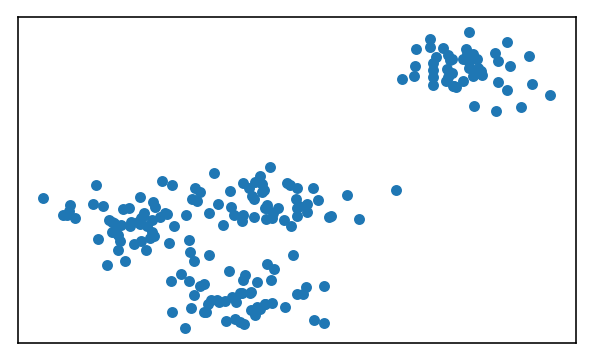

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1);

plt.figure(figsize=(5,3), dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o');

接着使用KMeans模型来拟合。设置类别数量为3，并计算拟合后的成本：

In [6]:
from sklearn.cluster import KMeans

n_clusters = 3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X);
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X))))

kmean: k=3, cost=-668


`Kmeans.score()` 函数计算 k-means 算法拟合后的成本，用负数表示，**绝对值越大，说明成本越高。** 在 sklearn 中，计算成本的方法略有不同，它是计算训练样例到期所属聚类中心点的距离的总和。

我们可以把分类后的样本及其所属的聚类中心画出来，直观观察拟合结果。

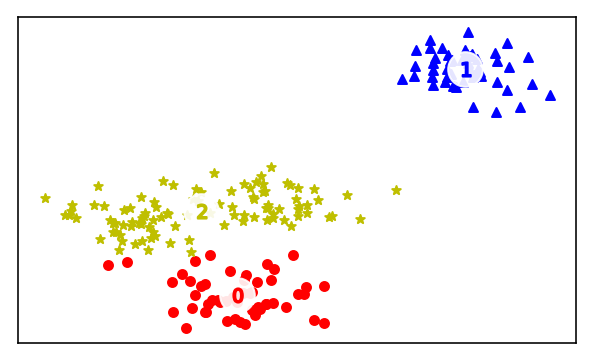

In [8]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o', '^', '*']
colors = ['r', 'b', 'y']

plt.figure(figsize=(5,3), dpi=144)
plt.xticks(())
plt.yticks(())

# 画样本
for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                marker=markers[c], s=20, c=colors[c])
# 画出中心点
plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

分别选择 `k=2,3,4` 这3种不同的聚类个数，观察下 k-means 的拟合结果及其成本值。

In [9]:
def fit_plot_kmean_model(n_clusters, X):
    plt.xticks(())
    plt.yticks(())

    # 使用 k-均值算法进行拟合
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)

    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o', '^', '*', 's']
    colors = ['r', 'b', 'y', 'k']

    # 计算成本
    score = kmean.score(X)
    plt.title("k={}, score={}".format(n_clusters, (int)(score)))

    # 画样本
    for c in range(n_clusters):
        cluster = X[labels == c]
        plt.scatter(cluster[:, 0], cluster[:, 1], 
                    marker=markers[c], s=20, c=colors[c])
    # 画出中心点
    plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=0.9, s=300)
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

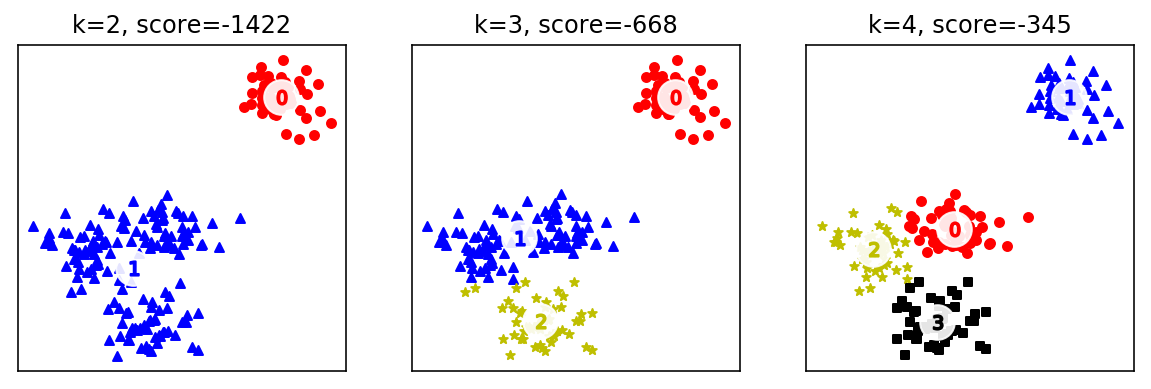

In [10]:
from sklearn.cluster import KMeans

n_clusters = [2, 3, 4]

plt.figure(figsize=(10, 3), dpi=144)
for i, c in enumerate(n_clusters):
    plt.subplot(1, 3, i + 1)
    fit_plot_kmean_model(c, X)

### 学习向量量化(learning Vector  Quantization，简称LVQ)

与 k-means 算法类似， LVQ 也是试图找到一组原型向量来刻画聚类结构（聚类结构某种意义上是按照某种度量对数据进行空间上的分布的划分）。**LVQ 是针对带标记的数据样本，利用样本的监督信息来辅助学习进行聚类。**

给定样本集 $D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ... , (\mathbf{x}_m, y_m)\},$ 其中 $ \mathbf{x}_j = (x_{j1}, x_{j2}, ...,x_{jn}), y_i\in Y$ 是样本 $\mathbf{x}_j$ 的类别标记。LVQ 的目标是学习一组向量 $\{\mathbf{p}_1, \mathbf{p}_2,...,\mathbf{p}_q\}$，每个原型向量代表一个聚类簇，簇标记为$t_i\in Y$。

**LVQ 算法流程图：**
***
* **输入：**

    * 样本集 $D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ... , (\mathbf{x}_m, y_m)\}$;
    * 原型向量个数q，相应的类别标记$\{t_1, t_2, ..., t_q\}$，个数和相应标记根据实际应用场景来设定；
    * 学习率 $\eta\in (0,1)$
    
* **过程：**

    1. 初始化一组原型向量 $\{\mathbf{p}_1, \mathbf{p}_2,...,\mathbf{p}_q\}$，可以随机指定，后期进行优化；
    2. **repeat**   (是遍历所有样本么？)
    3. 算法随机选取一个带标记的训练样本$(\mathbf{x}_j, y_j)$;
    4. 计算样本到所有原型向量的距离：$d_{ji} = ||\mathbf{x}_j-\mathbf{p}_i||_2,\;(1\geq i \geq q)$;
    5. 找出和 $\mathbf{x}_j$ 距离最近的原型向量 $\mathbf{p}^\ast_i, \; i^\ast = \arg\min_{1\geq i \geq q}d_{ji}$;
    6. 通过判定样本标记 $y_j, t_i^\ast$ 是否一致来更新权重：
        $$\mathbf{p}^\prime = \mathbf{p}^\ast_i + \eta\cdot(\mathbf{x}_j-\mathbf{p}_i)\cdot (y_j=t_i^\ast)^{bool}$$
    7. 将原型向量 $\mathbf{p}^\ast_i$ 更新为 $\mathbf{p}^\prime$;
    8. **until满足条件**  (如达到最大迭代次数)
    
* **输出：** 原型向量 $\{\mathbf{p}_1, \mathbf{p}_2,...,\mathbf{p}_q\}$     

注：
1. $(\cdot)^{bool}$ 表示布尔函数，真取值为1；否则为-1。
2. 从算法流程上看，该算法可以进行并行计算。
***

更新后的原型向量 $\mathbf{p}^\prime$ 和 $\mathbf{x}_j$ 的距离是：

$$\begin{split}
||\mathbf{p}^\prime - \mathbf{x}_j||_2 &= ||\mathbf{p}^\ast_i + \eta\cdot(\mathbf{x}_j-\mathbf{p}_i)\cdot (y_j=t_i^\ast)^{bool} -  \mathbf{x}_j||_2\\
\\
&= ||\mathbf{p}^\ast_i  - \mathbf{x}_j||_2\cdot |\eta\cdot (y_j=t_i^\ast)^{bool} - 1 |\\
\\
&=\left\{
\begin{aligned}
(1-\eta)||\mathbf{p}^\ast_i  - \mathbf{x}_j||_2 & \quad y_j=t_i^\ast\\
(1+\eta)||\mathbf{p}^\ast_i  - \mathbf{x}_j||_2 & \quad y_j\neq t_i^\ast
\end{aligned}
\right. 
\end{split}$$

由学习率 $\eta\in (0,1)$，从公式结果可以看出，当样本和 $\mathbf{p}^\ast_i$ 的标记相同时，原型向量 $\mathbf{p}^\ast_i$更靠近 $\mathbf{x}_j$； $\mathbf{x}_j$。

在学习得到一组原型向量 $\{\mathbf{p}_1, \mathbf{p}_2,...,\mathbf{p}_q\}$ 后，即可实现对样本空间$\mathbf{X}$的簇划分。**对任意的样本 $\mathbf{x}$，它将被划入与其距离最近的原型向量所代表的簇中。**

换言之，每个原型向量 $\mathbf{p}_i$ 定义了一个与之相关的区域 $R_i$：

$$R_i = \{ \mathbf{x}\in X\;| \; ||\mathbf{x}-\mathbf{p}_i||_2 \leq ||\mathbf{x}-\mathbf{p}_i^\prime ||_2,\; i^\prime \neq i\}$$

由此便形成了对样本空间 X 的划分 $\{R_1, R_2, ...,R_q\}$，该划分通常称为“Voronoi 剖分”。

**注：如果将 $R_i$ 中样本全部用原型向量$\mathbf{p}_i$ 表示，则可实现数据的“有损压缩”，这称为“向量量化”；LVQ由此而得名。**

### 高斯混合聚类

请参考周志华《机器学习》关于该模型的介绍。

## 密度聚类

密度聚类也称为“基于密度的聚类”(density-based clustering)，此类算法假设聚类结构可以通过样本分布的紧密程度确定。一般情况下，密度聚类算法从**样本密度**的角度来考察样本之间的可连接性，基于**可连接样本不断扩展聚类簇**以获得最终聚类结果。

### DBSCAN

#### 基本思想

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)是一种密度聚类算法，基于一组“邻域”参数$(\epsilon, MinPts)$ 来刻画样本分布的紧密程度。给定无标记样本集 $D = \{\mathbf{x}_1, \mathbf{x}_2,...,\mathbf{x}_m\}$，我们定义下面几个概念：
***
* **$\epsilon$-邻域**：对于 $\mathbf{x}_j \in D$ 而言，$\epsilon$-邻域定义为：
$$N_{\epsilon}(\mathbf{x}_j) = \{\mathbf{x}_i \in D \; | \; dist(\mathbf{x}_i, \mathbf{x}_j)\leq \epsilon\}$$注：其中的距离默认情形下为欧式距离；


* **核心对象(core object)**：我们称$\mathbf{x}_j$ 是一个核心对象，如果若 $\mathbf{x}_j$ 的 $\epsilon$-邻域至少包含 **MinPts** 个元素（样本），即

$$|N_{\epsilon}(\mathbf{x}_j)| \geq MinPts$$


* **密度直达(directly density-reachable)**: 我们称 $\mathbf{x}_j $ 由 $\mathbf{x}_i$ 密度直达，如果$\mathbf{x}_j $ 在 $\mathbf{x}_i$ 邻域里且 $\mathbf{x}_i$ 是核心对象，即

$$\mathbf{x}_j \in N_{\epsilon}(\mathbf{x}_i) \quad and \quad |N_{\epsilon}(\mathbf{x}_i)| \geq MinPts$$

* **密度可达(density-reachable)**: 我们称 $\mathbf{x}_j $ 由 $\mathbf{x}_i$ 密度可达，如果存在样本序列 $\{\mathbf{p}_1, \mathbf{p}_2,...,\mathbf{p}_n\}$，其中 $\mathbf{p}_1 = \mathbf{x}_i, \mathbf{p}_n = \mathbf{x}_j$ 且 $\mathbf{p}_{i+1}$ 由 
$\mathbf{p}_i$ 密度直达；


* **密度相连(density-connected):** 我们称 $\mathbf{x}_j $ 和 $\mathbf{x}_i$ 密度相连，如果存在 $\mathbf{x}_k$ 使得 $\mathbf{x}_i $ 和 $\mathbf{x}_j$ 均由 $\mathbf{x}_k$ 密度可达。
***

对三个概念的解释以及图示：

|定义|数学性质|概念理解|
| ---| ---|---|
|密度直达|通常不满足对称性|以 MinPts 为临界值，重新定义了邻域中心与邻域元素的关系|
|密度可达|满足直递性，但不满足对称性|在 密度直达 的意义下，元素之间具有直递性|
|密度相连|满足对称性|在密度可达的意义下，属于同一个集合，具有对称的连通性|

<img src='figure/DBSCAN.jpg'>

基于以上概念，DBSCAN 将“簇”定义为：**由密度可达关系导出的最大的密度相连样本集合。** 形式化说，给定邻域参数 $(\epsilon, MinPts)$，簇 $C \subseteq D$ 是满足以下性质的非空样本子集：

* 连接性(connectivity)： $\mathbf{x}_i\in C,\mathbf{x}_j\in C \Rightarrow \mathbf{x}_i \; 与 \;\mathbf{x}_j \;密度相连$；


* 最大性(maximality)： $\mathbf{x}_i\in C, \mathbf{x}_j \;由 \;\mathbf{x}_i \; 密度可达 \;\Rightarrow \mathbf{x}_j\in C$；

若 $\mathbf{x}$ 为核心对象，则由 $\mathbf{x}$ 密度可达的所有样本组成的集合 

$$X = \{\mathbf{x}^\prime \in D \;|\; \mathbf{x}^\prime \; 由 \; \mathbf{x} \; 密度可达\}$$

即为满足连接性和最大性的簇。

DBSCAN 算法任选数据集中的一个核心对象为“种子”，由此出发确定相应的聚类簇。算法如下图所示:
1. 第 1-7 行，算法根据给定的输入参数 $(\epsilon, MinPts)$ 找出所有核心对象；

2. 第 10-24 行，以任一核心对象为出发点，找出由密度可达的样本生成的聚类簇；

3. 直到所有核心对象均被访问过为止。

<img src='figure/DBSCAN-1.png' width='400' height='300' align='left'>

#### [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

### OPTICS

论文参考：[OPTICS: Ordering Points To Identify the Clustering Structure](http://www.dbs.ifi.lmu.de/Publikationen/Papers/OPTICS.pdf)

论文伪代码的实现如下：

In [3]:
# -*- coding: utf-8 -*-
import bisect

processed = True
unprocessed = False
NOISE = -1

import math
x_pi = math.pi * 3000.0 / 180.0
AA = 6378245.0
EE = 0.00669342162296594323
r = 6371



def distance_of_two_points(point_1, point_2):  
    '''
    计算两个经纬度点之间的距离
    type(point) = list
    point = [lat, lon]

    '''
    x_pi = math.pi * 3000.0 / 180.0
    AA = 6378245.0
    EE = 0.00669342162296594323
    r = 6371

    lat1, lon1, lat2, lon2 = map(math.radians, point_1+point_2)

    diff_lon = lon2 - lon1
    diff_lat = lat2 - lat1
    a = math.sin(diff_lat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(diff_lon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    return c * r * 1000


# cluster common part:give the neighbor
def neighbor(object_i, set_of_objects, eps, MinPts):

    neighbor_points_dict = {}
    points_num = set_of_objects.shape[1]

    a = set_of_objects[:, object_i]
    point_1 = [a[0], a[1]]

    for i in range(points_num):
        if i != object_i:
            b = set_of_objects[:, i]
            point_2 = [b[0], b[1]]
            dist = distance_of_two_points(point_1, point_2)
            if dist < eps:
                neighbor_points_dict[i] = dist

    dist_list = neighbor_points_dict.values()
    if len(dist_list) < MinPts:
        core_dist = 'undefined'
    else:
        core_dist = sorted(dist_list)[MinPts-1]

    return neighbor_points_dict.keys(), core_dist


# ------------- OPTICS -------------------
def seeds_update(object_i, set_of_objects, neighbor_object_i, processed_list, r_dist, c_dist_i, order_seeds):

    a = set_of_objects[:, object_i]
    point_1 = [a[0], a[1]]

    for object_k in neighbor_object_i:
        if processed_list[object_k] == unprocessed:

            b = set_of_objects[:, object_k]
            point_2 = [b[0], b[1]]
            new_r_dist = max(c_dist_i, distance_of_two_points(point_1, point_2))

            if r_dist[object_k] == 'undefined':
                r_dist[object_k] = new_r_dist
                bisect.insort_right(order_seeds, (new_r_dist, object_k))
            else:  # object already in order_seeds
                if new_r_dist < r_dist[object_k]:

                    old_index = bisect.bisect_left(order_seeds, (r_dist[object_k], object_k))
                    order_seeds.remove(order_seeds[old_index])

                    r_dist[object_k] = new_r_dist
                    bisect.insort_right(order_seeds, (new_r_dist, object_k))
    return order_seeds


def expand_cluster_order(set_of_objects, object_i, eps, MinPts, ordered_list, c_dist, r_dist, processed_list, neighbor_dict):

    order_seeds = []
    neighbor_dict[object_i], c_dist[object_i] = neighbor(object_i, set_of_objects, eps, MinPts)
    processed_list[object_i] = processed
    ordered_list.append(object_i)

    if c_dist[object_i] != 'undefined':

        order_seeds = seeds_update(object_i, set_of_objects, neighbor_dict[object_i], processed_list, r_dist, c_dist[object_i], order_seeds)

        while len(order_seeds) != 0:

            current_object = order_seeds[0][1]
            order_seeds.remove(order_seeds[0])

            neighbor_dict[current_object], c_dist[current_object] = neighbor(current_object, set_of_objects, eps, MinPts)
            processed_list[current_object] = processed
            ordered_list.append(current_object)

            if c_dist[current_object] != 'undefined':

                order_seeds = seeds_update(current_object, set_of_objects, neighbor_dict[current_object], processed_list, r_dist, c_dist[current_object], order_seeds)

    return ordered_list, c_dist, r_dist


def cluster_extracting(ordered_list, r_dist, c_dist, eps_small):
    size = len(ordered_list)
    cluster_mark = [NOISE] * size
    cluster_id = NOISE
    k = 0
    for i in xrange(size):
        object_cur = ordered_list[i]

        if r_dist[object_cur] > eps_small or r_dist[object_cur] == 'undefined':
            if c_dist[object_cur] <= eps_small:
                k += 1
                cluster_id = k
                cluster_mark[object_cur] = cluster_id
            else:
                cluster_mark[object_cur] = NOISE
        else:
            cluster_mark[object_cur] = cluster_id

    return cluster_mark


def optics_paper(set_of_objects, optics_para):

    eps = optics_para[0]
    eps_small = optics_para[1]
    MinPts = optics_para[2]

    size = set_of_objects.shape[1]

    # initialize
    ordered_list = []
    processed_list = [unprocessed] * size
    r_dist = ['undefined'] * size
    c_dist = ['undefined'] * size
    neighbor_dict = {}

    for object_i in xrange(size):
        if processed_list[object_i] == unprocessed:

            ordered_list, c_dist, r_dist = expand_cluster_order(set_of_objects, object_i, eps, MinPts, ordered_list, c_dist, r_dist, processed_list, neighbor_dict)

    return cluster_extracting(ordered_list, r_dist, c_dist, eps_small)

### DENCLUE

论文参考：[An efficient approach to clustering in large multimedia databases with noise](https://pdfs.semanticscholar.org/e090/2669a15b62c80abac73ad75afbd3a241256a.pdf)

## 层次聚类

层次聚类(hierarchical clustering)试图在不同层次对数据集进行划分，从而形成**树形的聚类结构。** 数据集的划分可采用“自底而上”的聚合策略，也可以采用“自顶而下”的分拆策略。

### AGNES

#### 基本思想

AGNES 是一种采用自底而上聚合策略的层次聚类算法：
1. 先将数据集里的每一个样本看做一个初始聚类簇；
2. 在算法运行的每一步中找出距离最近的两个聚类簇进行合并；
3. 重复步骤2直到达到预设的聚类簇个数。

上述的关键是计算聚类簇之间的距离策略。簇本身是一个集合，所以只需采用关于集合的某种度量距离方式即可。给定聚类簇$C_i, C_j$,可以通过下面三种方式来计算距离：

$$\begin{split}
最小距离： &\quad d_{\min}(C_i, C_j) = \min_{\mathbf{x}\in C_i, \mathbf{z}\in C_j} dist(\mathbf{x}, \mathbf{z})\\
最大距离： &\quad d_{\max}(C_i, C_j) = \max_{\mathbf{x}\in C_i, \mathbf{z}\in C_j} dist(\mathbf{x}, \mathbf{z})\\
平均距离： &\quad d_{avg}(C_i, C_j) = \frac{1}{|C_i||C_j|}\sum_{\mathbf{x}\in C_i}\sum_{\mathbf{z}\in C_j}dist(\mathbf{x}, \mathbf{z})\\
\end{split}$$

注：一般情况下，集合间的距离计算常用[hausdorff distance](https://zh.wikipedia.org/wiki/%E8%B1%AA%E6%96%AF%E5%A4%9A%E5%A4%AB%E8%B7%9D%E7%A6%BB)。

**当聚类距离由 $d_{\min}$、$d_{\max}$、$d_{avg}$ 计算时，AGNES算法被相应地称为“单链接”(single-linkage)、“全链接”(complete-linkage)、“均链接”(average-linkage)算法。**

AGNES 算法描述如下：

1. 1-9行算法先对仅含一个样本的初始聚类簇和相应的距离矩阵进行初始化；
2. 11-23行，AGNES 不断合并距离最近的聚类簇，并对合并得到的聚类簇的距离矩阵进行更新；
3. 不断重复步骤2直到达到预设的聚类簇数。

<img src='figure/AGNES.jpg' width='300' height='300' align='left'>
<img src='figure/AGNES-1.png' width='400' height='300' align='right'>

#### [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

### DIANA

采用自顶向下的分拆策略。

书籍参考：Finding groups in data: An introduction to cluster analysis

### BIRCH

BIRCH 论文参考：[BIRCH: An Efficient Data Clustering Method for very Large Databases](https://www.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf)

[sklearn.cluster.Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch)

### ROCK

ROCK 论文参考：[ROCK: A Robust Clustering Algorithm for Categorical Attributes](http://theory.stanford.edu/~sudipto/mypapers/categorical.pdf)